# Spatial Data Analysis Raster Data 
# Created by Sreya Dhar
# Date: 11/08/2021

In [ ]:
!pip install pyshp geopandas

     |████████████████████████████████| 219 kB 4.1 MB/s 
     |████████████████████████████████| 1.0 MB 46.2 MB/s 
     |████████████████████████████████| 6.3 MB 29.0 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=e22f79658ba002955b13cd56c383f3757d978c32c949f84806ff8e96377da213
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import json
import ogr

In [ ]:
import shapefile
from pprint import pprint
shape = shapefile.Reader("/content/global_impervious_surface_2010.shp")
print(shape)
feature = []
feature = shape.shapeRecords()[0]
first = feature.shape.__geo_interface__  
pprint(first) # (GeoJSON format)


shapefile Reader
    676 shapes (type 'POLYGON')
    676 records (26 fields)
{'coordinates': [[(2.95647868, 13.78992077),
                  (2.9473486799999997, 13.78992077),
                  (2.9473486799999997, 13.80792077),
                  (2.95647868, 13.80792077),
                  (2.95647868, 13.78992077)]],
 'type': 'Polygon'}


In [ ]:
import geopandas as gpd
shapefile = "/content/global_impervious_surface_2010.shp"
data = gpd.read_file(shapefile)
data.head()

,CLASS_ID,CLASS_NAME,AREA,FX_AREA,FX_LENGTH,FX_COMPACT,FX_CONVEX,FX_SOLID,FX_ROUND,FX_FORMFAC,FX_ELONG,FX_RECT_FI,FX_MAIN_DI,FX_MAJAXLN,FX_MINAXLN,FX_NUMHOLE,FX_HOLESOL,AVG_B1,STD_B1,MIN_B1,MAX_B1,TXRAN_B1,TXAVG_B1,TXVAR_B1,TXENT_B1,geometry
0,0,Unclassified,2.0,1.998467e+06,5989.331543,0.266333,1.000000,1.000000,0.642006,0.700084,1.983221,1.000000,90.000000,1990.829224,1003.836426,0.0,1.0,1.861120,0.227755,1.633365,2.088876,1.722333,1.287235,0.312674,-0.443060,"POLYGON ((2.95648 13.78992, 2.94735 13.78992, ..."
1,0,Unclassified,49.0,4.896244e+07,44000.367188,0.179445,1.298982,0.671233,0.458186,0.317805,1.314054,0.472873,158.780960,11664.491211,8876.724609,0.0,1.0,4.631206,4.529080,0.386987,19.556803,5.665395,4.277798,6.160057,-0.712877,"POLYGON ((8.93663 13.78992, 8.90924 13.78992, ..."
2,0,Unclassified,3.0,2.997700e+06,7997.004395,0.244299,1.079007,0.857143,0.477474,0.589038,1.330195,0.498833,44.336376,2827.316162,2125.489746,0.0,1.0,1.812142,0.531358,1.091343,2.356522,2.285334,0.990063,0.673210,-0.914727,"POLYGON ((5.65896 13.75392, 5.64983 13.75392, ..."
3,0,Unclassified,14.0,1.398927e+07,18001.681641,0.234444,1.138202,0.823529,0.610924,0.542474,1.266279,0.607584,21.805794,5399.567871,4264.120117,0.0,1.0,2.123036,1.482666,0.561577,5.379716,2.600452,1.819092,0.916572,-0.864865,"POLYGON ((7.98711 13.75392, 7.96885 13.75392, ..."
4,0,Unclassified,49.0,4.896244e+07,37943.660156,0.208088,1.202464,0.790323,0.348410,0.427361,2.118416,0.579684,63.975391,13376.464844,6314.371582,0.0,1.0,2.163721,1.667102,0.602687,8.404387,2.432241,1.949449,1.063065,-0.822236,"POLYGON ((5.29376 13.70892, 5.27550 13.70892, ..."


In [ ]:
#Export it as GeoJSON
data.to_file("global_impervious_surface_2010.json", driver='GeoJSON')
with open('global_impervious_surface_2010.json') as f:
  data_json = json.load(f)
data_json["features"][5]['properties']


{'AREA': 6.0,
 'AVG_B1': 2.01948,
 'CLASS_ID': '0',
 'CLASS_NAME': 'Unclassified',
 'FX_AREA': 5995400.5,
 'FX_COMPACT': 0.27616,
 'FX_CONVEX': 1.0,
 'FX_ELONG': 1.512691,
 'FX_FORMFAC': 0.7527,
 'FX_HOLESOL': 1.0,
 'FX_LENGTH': 10004.676758,
 'FX_MAIN_DI': 180.0,
 'FX_MAJAXLN': 3011.509277,
 'FX_MINAXLN': 1990.829224,
 'FX_NUMHOLE': 0.0,
 'FX_RECT_FI': 1.0,
 'FX_ROUND': 0.841705,
 'FX_SOLID': 1.0,
 'MAX_B1': 2.721297,
 'MIN_B1': 1.29598,
 'STD_B1': 0.502663,
 'TXAVG_B1': 1.676106,
 'TXENT_B1': -0.573375,
 'TXRAN_B1': 1.674892,
 'TXVAR_B1': 0.299173}

In [ ]:
data_json["features"][5]['geometry']['coordinates']

[[[9.15574868, 13.70892077],
  [9.12835868, 13.70892077],
  [9.12835868, 13.72692077],
  [9.15574868, 13.72692077],
  [9.15574868, 13.70892077]]]

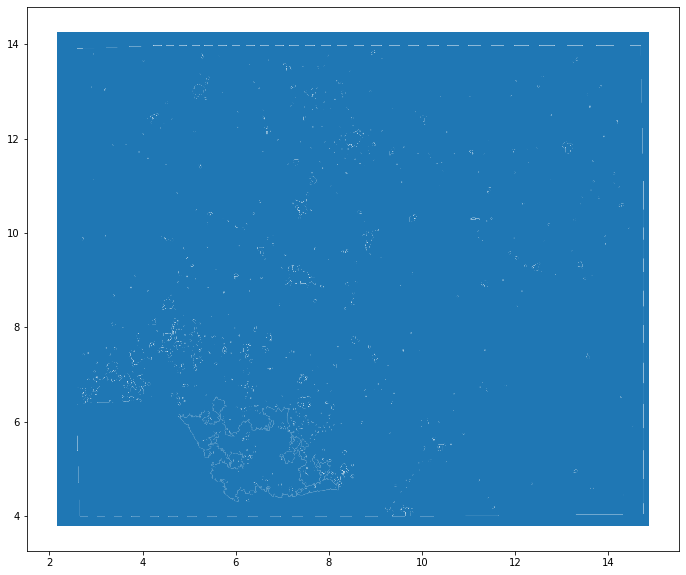

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(figsize=(20, 10))
plt.show()

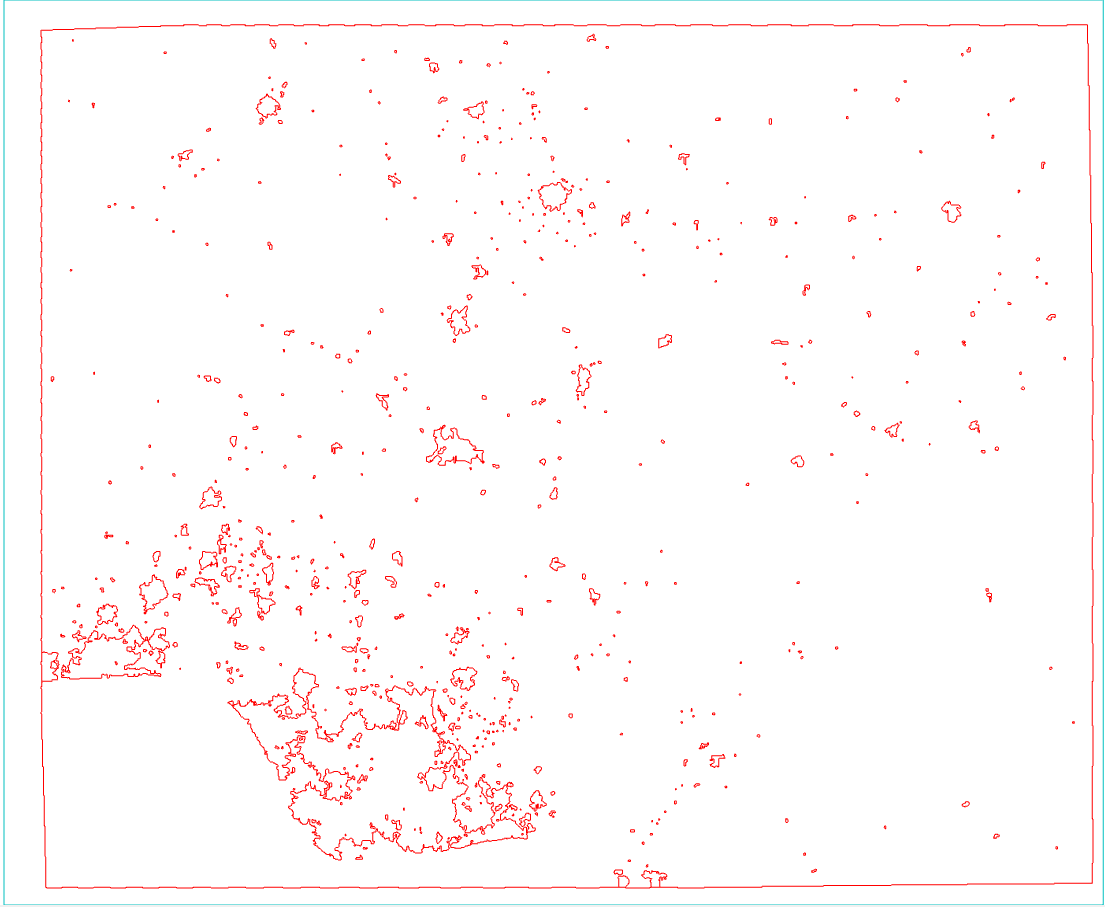

In [ ]:
# Print columns
print(data.columns)

Index(['CLASS_ID', 'CLASS_NAME', 'AREA', 'FX_AREA', 'FX_LENGTH', 'FX_COMPACT',
       'FX_CONVEX', 'FX_SOLID', 'FX_ROUND', 'FX_FORMFAC', 'FX_ELONG',
       'FX_RECT_FI', 'FX_MAIN_DI', 'FX_MAJAXLN', 'FX_MINAXLN', 'FX_NUMHOLE',
       'FX_HOLESOL', 'AVG_B1', 'STD_B1', 'MIN_B1', 'MAX_B1', 'TXRAN_B1',
       'TXAVG_B1', 'TXVAR_B1', 'TXENT_B1', 'geometry'],
      dtype='object')


In [ ]:
# It is possible to get a specific column by specifying the column name 
data_major = data[['AREA', 'geometry', 'FX_ROUND', 'FX_CONVEX']]
geom_sort =  data_major.sort_values("AREA", ascending=False)
geom_sort.head()

,AREA,geometry,FX_ROUND,FX_CONVEX
674,1415352.0,"POLYGON ((2.82866 3.97992, 2.64606 3.97992, 2....",1.001528,4.788217
675,148424.0,"POLYGON ((14.88939 3.78192, 2.15304 3.78192, 2...",0.096296,1.990236
666,36725.0,"POLYGON ((6.06068 4.30392, 6.02416 4.30392, 6....",0.275003,4.974547
484,4302.0,"POLYGON ((3.02952 6.40092, 2.91083 6.40092, 2....",0.356313,2.447336
276,1668.0,"POLYGON ((7.26584 8.87592, 7.19280 8.87592, 7....",0.418469,2.147271


In [ ]:
geom_sort.tail()

,AREA,geometry,FX_ROUND,FX_CONVEX
504,2.0,"POLYGON ((7.84103 6.16692, 7.83190 6.16692, 7....",0.642006,1.0
502,2.0,"POLYGON ((7.45757 6.18492, 7.44844 6.18492, 7....",0.642006,1.0
501,2.0,"POLYGON ((7.30236 6.19392, 7.29323 6.19392, 7....",0.642006,1.0
82,2.0,"POLYGON ((8.52578 12.26892, 8.51665 12.26892, ...",0.642006,1.0
0,2.0,"POLYGON ((2.95648 13.78992, 2.94735 13.78992, ...",0.642006,1.0


In [ ]:
gdf = gpd.GeoDataFrame(geom_sort)
gdf = gdf.to_crs('epsg:3857')
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

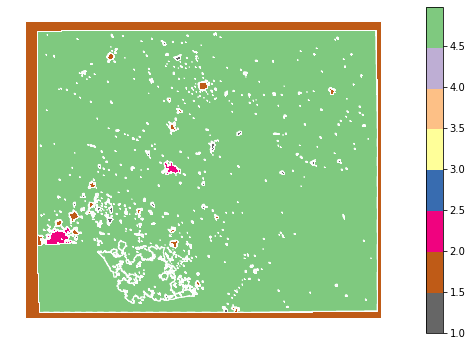

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))
geom_sort.plot(column='FX_CONVEX', cmap='Accent_r', linewidth=1, ax=ax, edgecolor='1.', legend = True)
ax.axis('off')
plt.show()

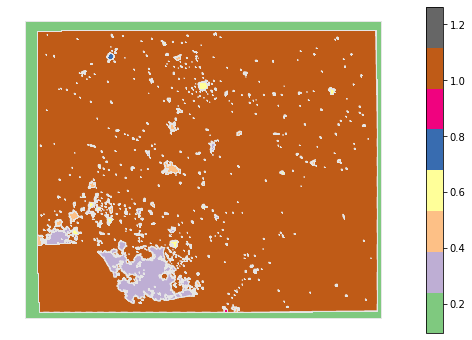

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))
geom_sort.plot(column='FX_ROUND', cmap='Accent', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.show()

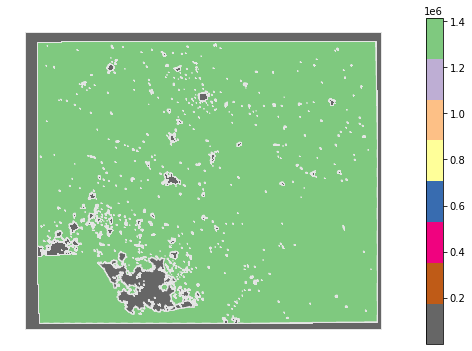

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))
geom_sort.plot(column='AREA', cmap='Accent_r', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.show()

In [ ]:
!pip install pysal contextily rioxarray

     |████████████████████████████████| 46 kB 1.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.4 MB 8.8 MB/s 
     |████████████████████████████████| 95 kB 3.5 MB/s 
     |████████████████████████████████| 60 kB 6.6 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 164 kB 65.3 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
     |████████████████████████████████| 41 kB 563 kB/s 
     |████████████████████████████████| 209 kB 53.7 MB/s 
     |████████████████████████████████| 5.7 MB 13.6 MB/s 
     |████████████████████████████████| 81 kB 9.2 MB/s 
     |████████████████████████████████| 138 kB 60.0 MB/s 
     |████████████████████████████████| 226 kB 61.4 MB/s 
     |████████████████████████████████| 240 kB 53.4 MB/s 
     |████████████████████████████████| 66.5 MB 6.5 kB/s 
     |█████████████

In [ ]:
import contextily
import geopandas
# import rioxarray
import seaborn
import pandas 
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from pysal.lib import cg as geometry
from pysal.lib import weights

In [ ]:
wr = weights.contiguity.Rook.from_dataframe(gdf)
# Build a regular 3x3 lattice and draw it here
wq = weights.contiguity.Queen.from_dataframe(gdf)
wq.neighbors.get(1)

[0, 27, 7]

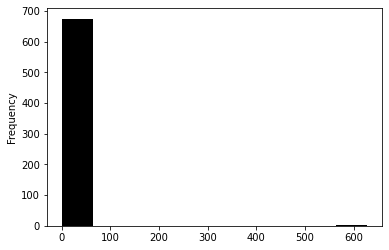

In [ ]:
pandas.Series(wq.cardinalities).plot.hist(color='k');

In [ ]:
print(wq.n)
print(wq.pct_nonzero)

676
0.30023458562375266


0.2958579881656805


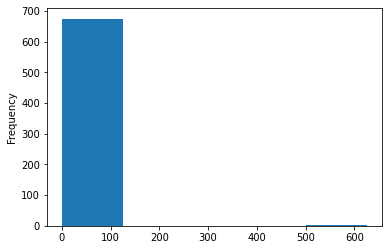

In [ ]:
w_rook = weights.contiguity.Rook.from_dataframe(gdf)
print(w_rook.pct_nonzero)
s = pandas.Series(w_rook.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

In [ ]:
wk4_dist = weights.distance.KNN.from_dataframe(gdf, k=4)
wk4_dist[0]

{8: 1.0, 28: 1.0, 34: 1.0, 71: 1.0}

In [ ]:
wk4 = weights.distance.KNN.from_dataframe(gdf, k=4, radius = geometry.sphere.RADIUS_EARTH_KM)
print(wk4.islands)
wk4.histogram

[]


[(4, 676)]

In [ ]:
wk4[0]

{77: 1.0, 457: 1.0, 568: 1.0, 620: 1.0}

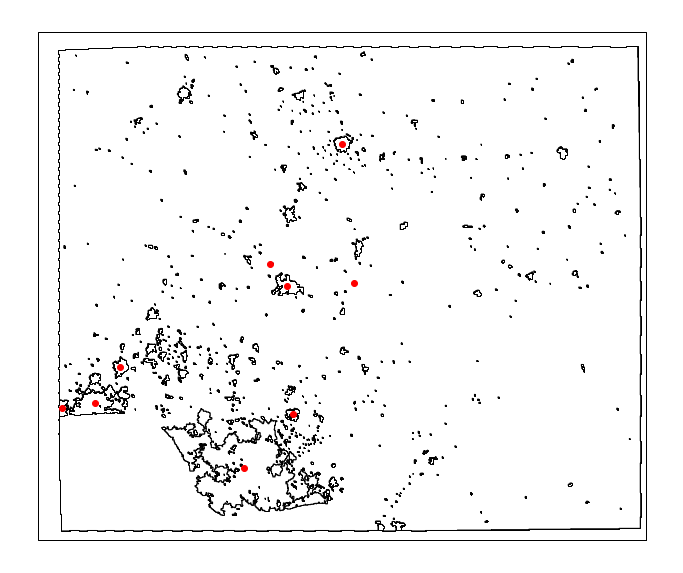

In [ ]:
# Create subset of tracts
# Plot polygons
ax = gdf.plot(facecolor='w', edgecolor='k', figsize=(12,12))
# Create and plot centroids
gdf.head(9).centroid.plot(color='r', ax=ax)
# Remove axis
ax.set_axis_off();
plt.show()

In [ ]:
# Build weights with adaptive bandwidth
w_adaptive = weights.distance.Kernel.from_dataframe(
    gdf,fixed=False, k=9
)
# Print first five bandwidth values
w_adaptive.bandwidth[:5]

array([[69882.25573068],
       [58544.09182031],
       [44381.01079034],
       [56888.10125822],
       [67777.42181164]])

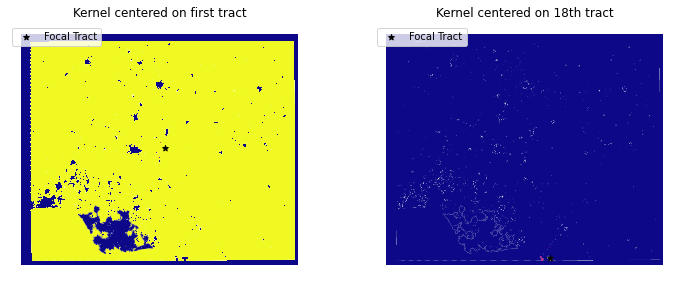

In [ ]:

# Create full matrix version of weights
full_matrix, ids = w_adaptive.full()
# Set up figure with two subplots in a row
f,ax = plt.subplots(
    1, 2, figsize=(12,6), subplot_kw=dict(aspect='equal')
)
# Append weights for first polygon and plot on first subplot
gdf.assign(
    weight_0 = full_matrix[0]
).plot("weight_0", cmap='plasma', ax=ax[0])
# Append weights for 18th polygon and plot on first subplot
gdf.assign(
    weight_18 = full_matrix[17]
).plot("weight_18", cmap='plasma', ax=ax[1])
# Add centroid of focal tracts
gdf.iloc[[0], :].centroid.plot(
    ax=ax[0], marker="*", color="k", label='Focal Tract'
)
gdf.iloc[[17], :].centroid.plot(
    ax=ax[1], marker="*", color="k", label='Focal Tract'
)
# Add titles
ax[0].set_title("Kernel centered on first tract")
ax[1].set_title("Kernel centered on 18th tract")
# Remove axis
[ax_.set_axis_off() for ax_ in ax]
# Add legend
[ax_.legend(loc='upper left') for ax_ in ax];

KNN-Analysis

In [ ]:
mx_queen = weights.contiguity.Queen.from_dataframe(gdf)
mx_knn4 = weights.KNN.from_dataframe(gdf, k=4)
mx_knn9 = weights.KNN.from_dataframe(gdf, k=9)
mx_knn15 = weights.KNN.from_dataframe(gdf, k=15)
mx_knn20 = weights.KNN.from_dataframe(gdf, k=20)

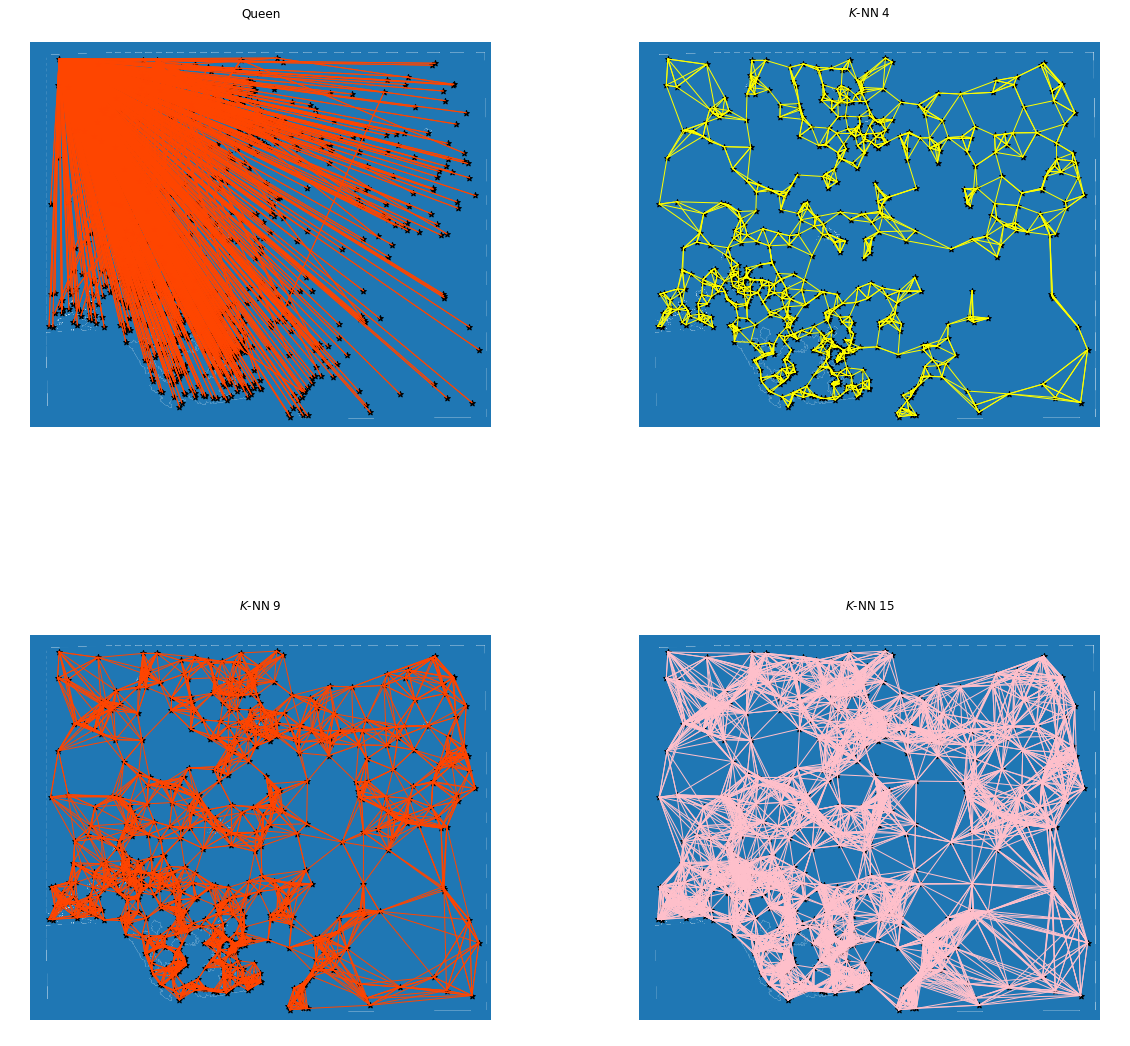

In [ ]:
# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(20, 20))

# contiguity
ax = axs[0, 0]
gdf.plot(ax=ax)
mx_queen.plot(
    gdf, 
    edge_kws=dict(linewidth=1, color='orangered'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('Queen')

# KNN = 4
ax = axs[0, 1]
gdf.plot(ax=ax)
mx_knn4.plot(
    gdf, 
    edge_kws=dict(linewidth=1, color='yellow'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('$K$-NN 4')


# KNN = 9
ax = axs[1, 0]
gdf.plot(ax=ax)
mx_knn9.plot(
    gdf, 
    edge_kws=dict(linewidth=1, color='orangered'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('$K$-NN 9')

# KNN = 15
ax = axs[1, 1]
gdf.plot(ax=ax)
mx_knn15.plot(
    gdf, 
    edge_kws=dict(linewidth=1, color='pink'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('$K$-NN 15')
plt.show()